<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB
None
                age        weight           bmi  no_of_dependents  \
count

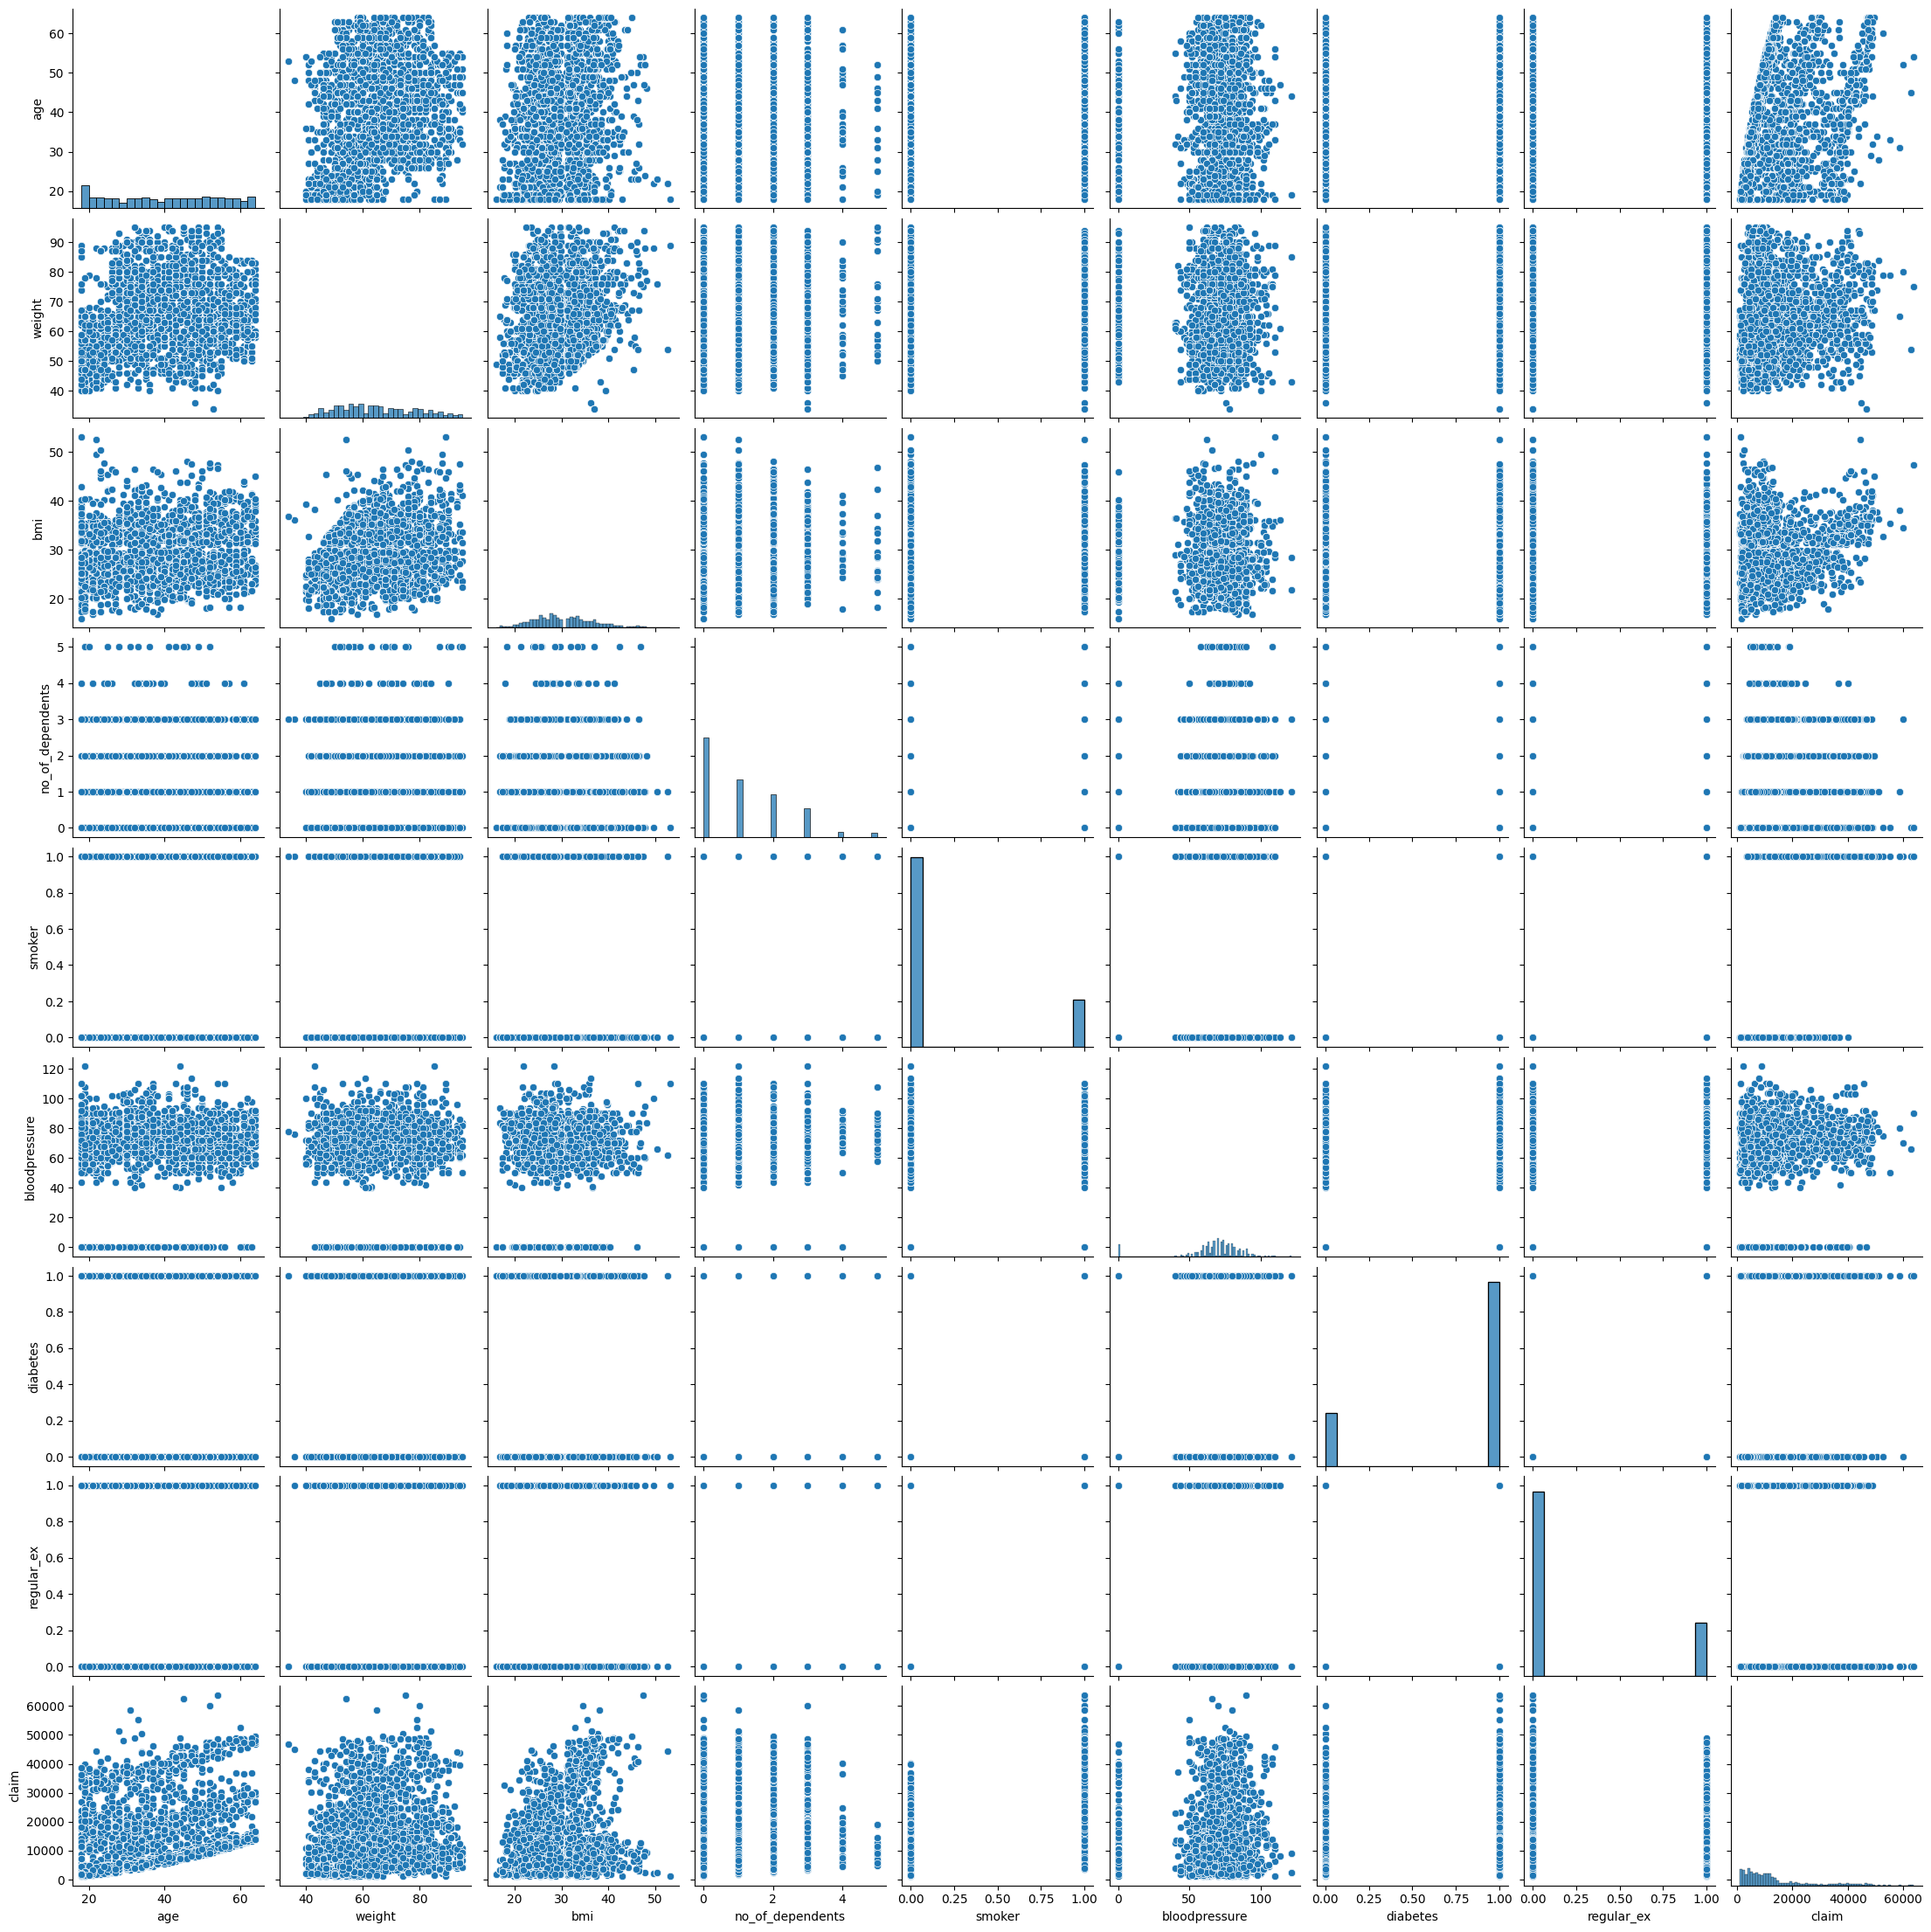

In [10]:
#EDA (Exploratory Data Analysis)
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()


In [12]:
#Feature Engineering
X = df.drop("city", axis=1)
y = df["city"]

categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


ValueError: A given column is not a column of the dataframe

    age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to

C:\Users\SAYAN SARKAR\AppData\Local\Temp\ipykernel_11920\890892723.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\SAYAN SARKAR\AppData\Local\Temp\ipykernel_11920\890892723.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

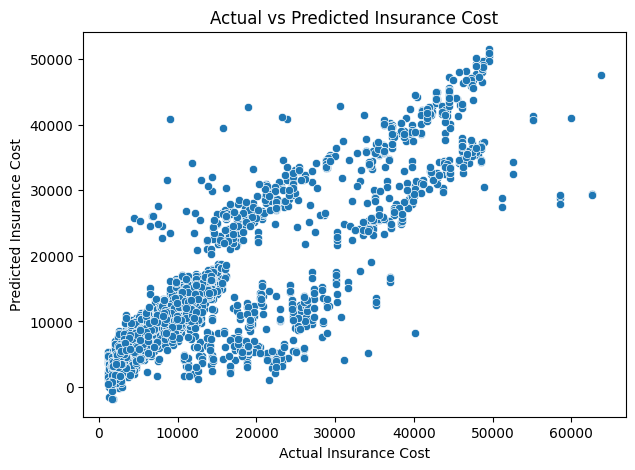


✅ Model saved as insurance_prediction_model.pkl


In [19]:
# 📌 Medical Insurance Cost Prediction (Custom Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load dataset
df = pd.read_csv("C:/Users/SAYAN SARKAR/Downloads/medicalinsurance.csv")

# ✅ Display first few rows
print(df.head())
print(df.info())

# ✅ Handle missing values
# Replace missing numeric values with median
df["age"].fillna(df["age"].median(), inplace=True)
df["bmi"].fillna(df["bmi"].median(), inplace=True)

# 🚨 Drop unnecessary columns if required (optional)
# Example: weight may be redundant when BMI exists, but we keep it here

# ✅ Define features & target
X = df.drop(["claim"], axis=1)  
y = df["claim"]

# ✅ Identify categorical & numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# ✅ Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop='first'), categorical_cols),
        ("num", SimpleImputer(strategy='median'), numeric_cols)
    ]
)

# ✅ Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
model.fit(X_train, y_train)

# ✅ Prediction
y_pred = model.predict(X_test)

# ✅ Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🚀 Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# ✅ Plot actual vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Insurance Cost")
plt.ylabel("Predicted Insurance Cost")
plt.title("Actual vs Predicted Insurance Cost")
plt.show()

# ✅ Save the model
import joblib
joblib.dump(model, "insurance_prediction_model.pkl")

print("\n✅ Model saved as insurance_prediction_model.pkl")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB
None
                age        weight           bmi  no_of_dependents  \
count

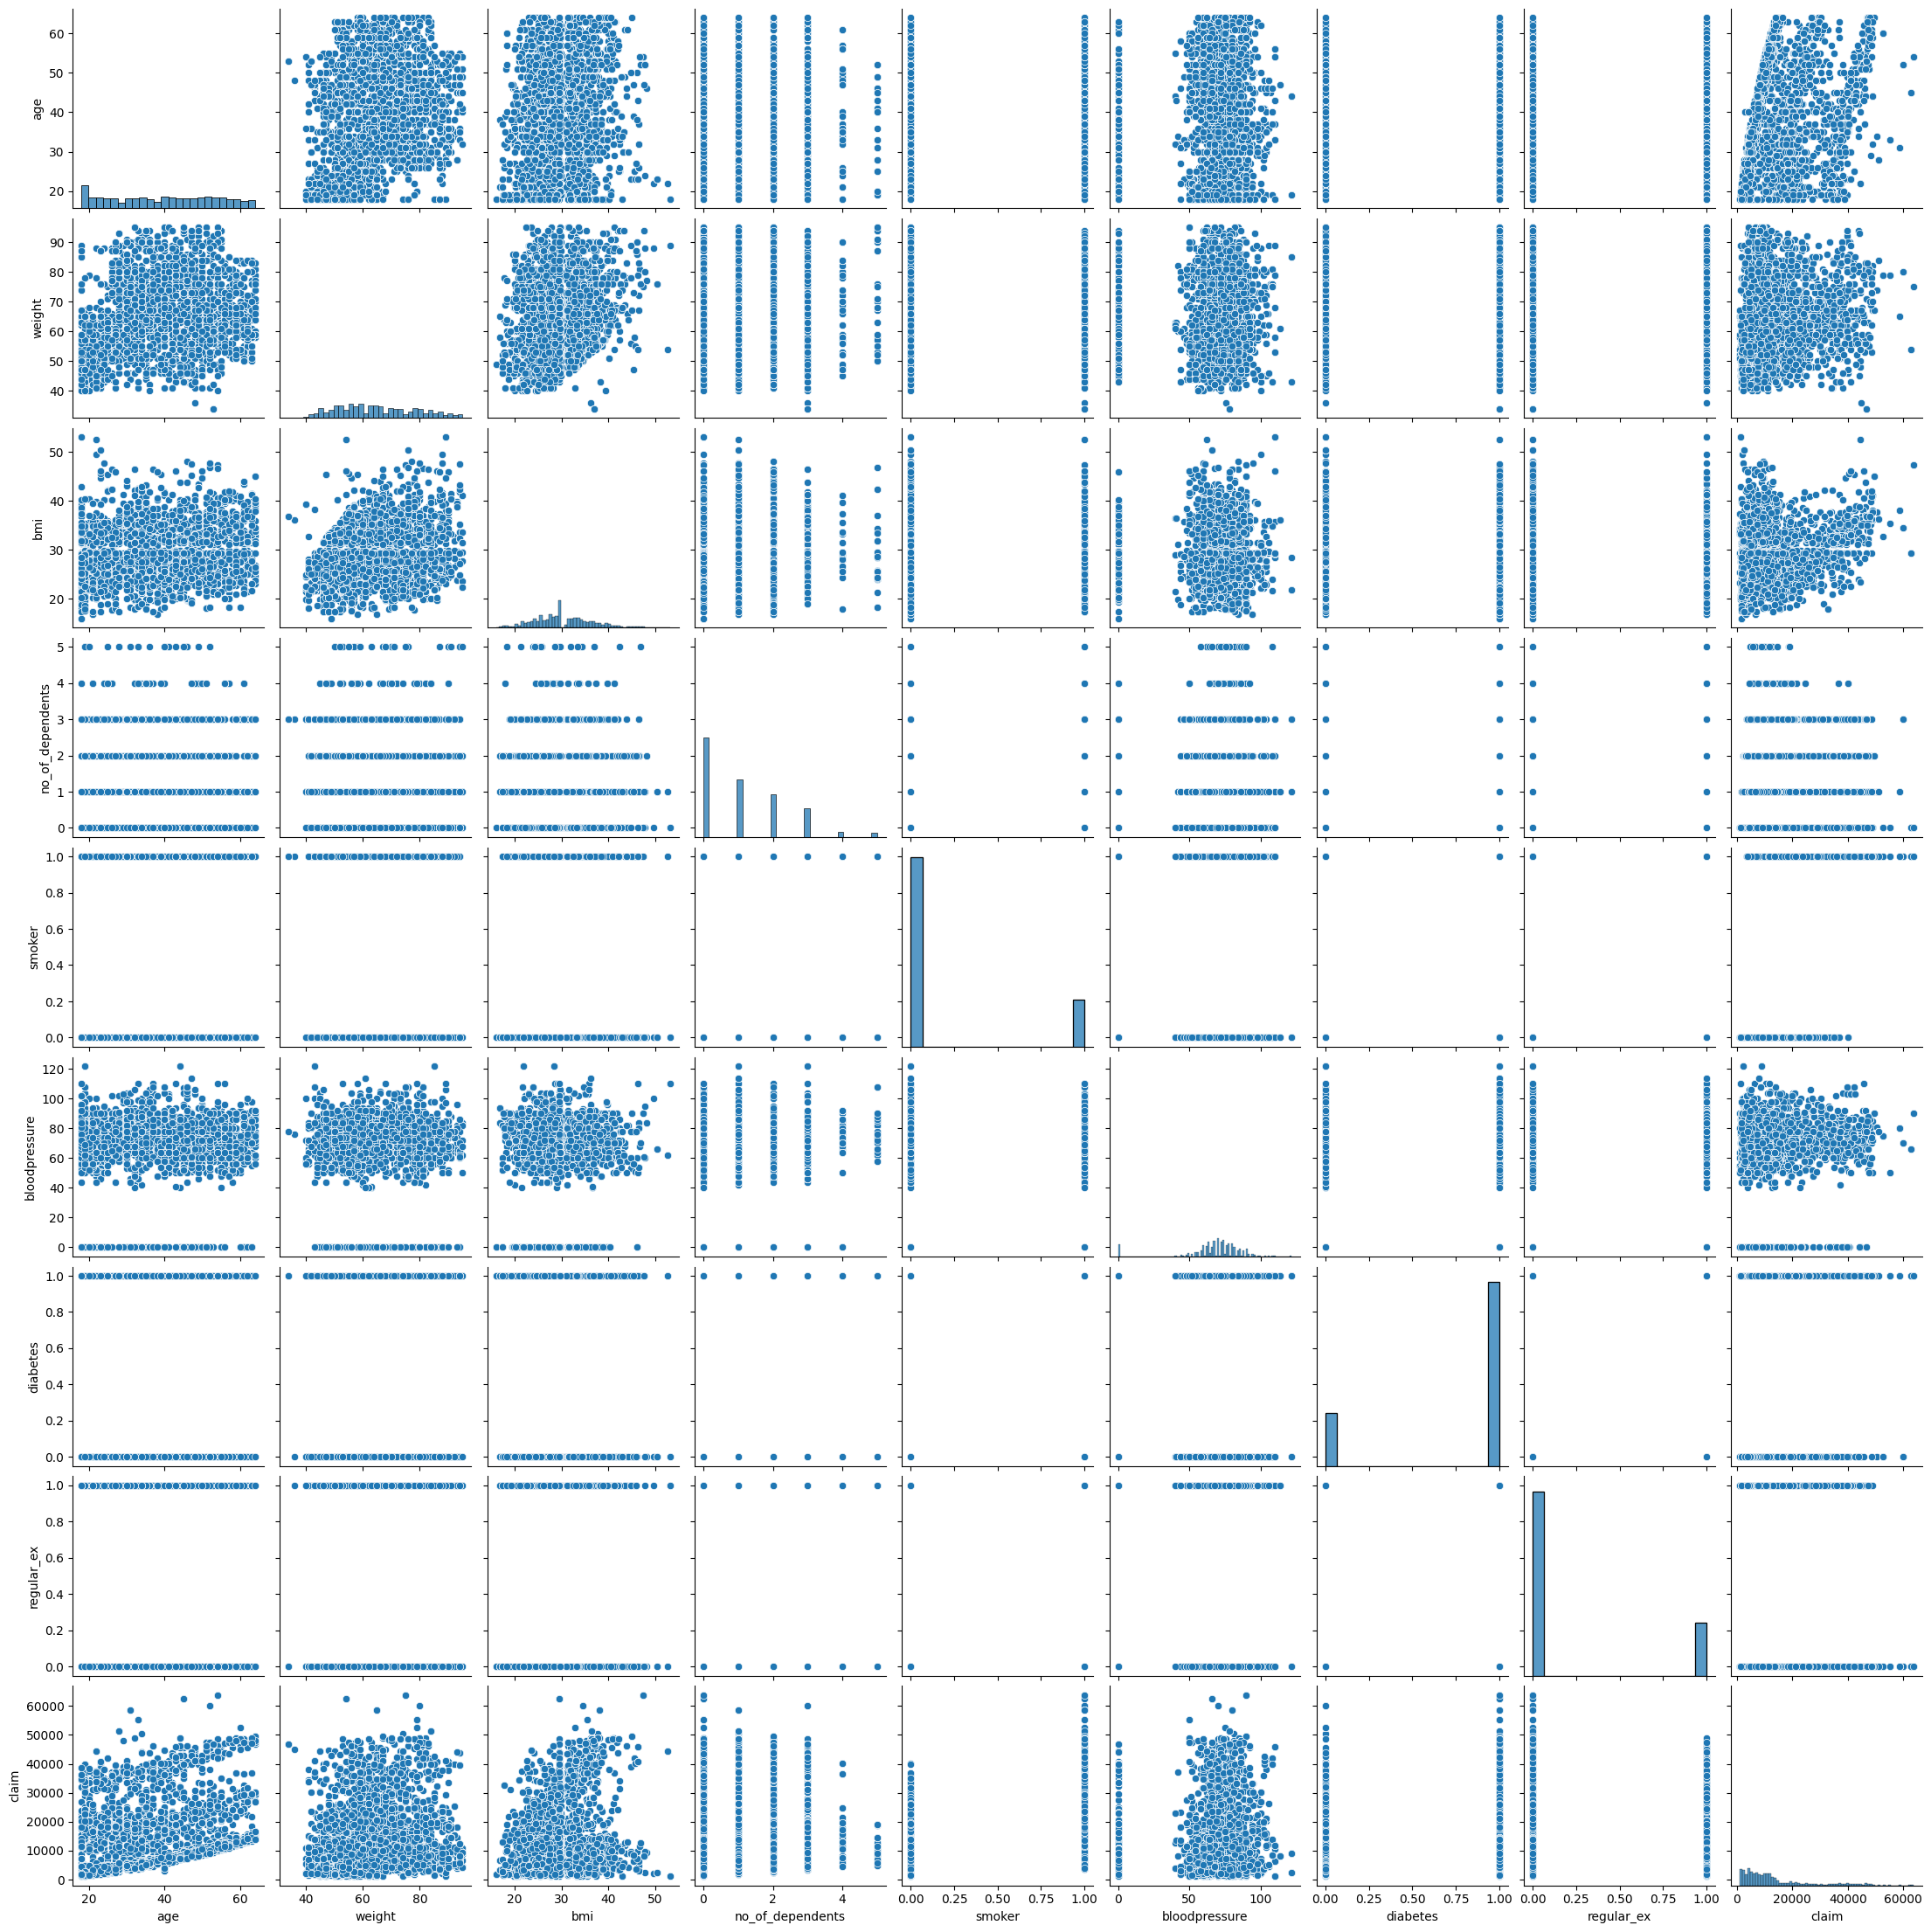

In [20]:
#EDA (Exploratory Data Analysis)
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()